# Kaggle - Bike Sharing Demand_1

In [1]:
import pandas as pd

## Load Dataset

In [2]:
train = pd.read_csv("data/train.csv")

print(train.shape)

train.head()

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
test = pd.read_csv("data/test.csv")

print(test.shape)

test.head()

(6493, 9)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


## Preprocessing

### 1. Parse datetime

In [4]:
train["datetime"] = pd.to_datetime(train["datetime"])

train["datetime-year"] = train["datetime"].dt.year
train["datetime-month"] = train["datetime"].dt.month
train["datetime-day"] = train["datetime"].dt.day
train["datetime-hour"] = train["datetime"].dt.hour
train["datetime-minute"] = train["datetime"].dt.minute
train["datetime-second"] = train["datetime"].dt.second

print(train.shape)
train[["datetime", "datetime-year", "datetime-month", "datetime-day", "datetime-hour", "datetime-minute", "datetime-second"]].head()

(10886, 18)


,datetime,datetime-year,datetime-month,datetime-day,datetime-hour,datetime-minute,datetime-second
0,2011-01-01 00:00:00,2011,1,1,0,0,0
1,2011-01-01 01:00:00,2011,1,1,1,0,0
2,2011-01-01 02:00:00,2011,1,1,2,0,0
3,2011-01-01 03:00:00,2011,1,1,3,0,0
4,2011-01-01 04:00:00,2011,1,1,4,0,0


In [5]:
test["datetime"] = pd.to_datetime(test["datetime"])

test["datetime-year"] = test["datetime"].dt.year
test["datetime-month"] = test["datetime"].dt.month
test["datetime-day"] = test["datetime"].dt.day
test["datetime-hour"] = test["datetime"].dt.hour
test["datetime-minute"] = test["datetime"].dt.minute
test["datetime-second"] = test["datetime"].dt.second

print(test.shape)
test[["datetime", "datetime-year", "datetime-month", "datetime-day", "datetime-hour", "datetime-minute", "datetime-second"]].head()

(6493, 15)


,datetime,datetime-year,datetime-month,datetime-day,datetime-hour,datetime-minute,datetime-second
0,2011-01-20 00:00:00,2011,1,20,0,0,0
1,2011-01-20 01:00:00,2011,1,20,1,0,0
2,2011-01-20 02:00:00,2011,1,20,2,0,0
3,2011-01-20 03:00:00,2011,1,20,3,0,0
4,2011-01-20 04:00:00,2011,1,20,4,0,0


## Explore

In [6]:
%matplotlib inline

import seaborn as sns

import matplotlib.pyplot as plt

### 1. datetime

### 1-1) 시각화를 하기 전 예상

1. 분(```Dates-minute```), 초(```Dates-second```)는 별 영향이 없을 가능성이 높음.

2. 일(```Dates-day```)의 경우 28일까지만 있는 달도 있으며, 31일 또한 한해 절반 정도 밖에 차지 하지 않으로 일 자체도 크게 영향을 주지는 않을것 같음.

3. 하지만 날씨와 연관지어 생각하거나 새벽이나 밤중에는 많이 빌리지 않을 수도 있음.

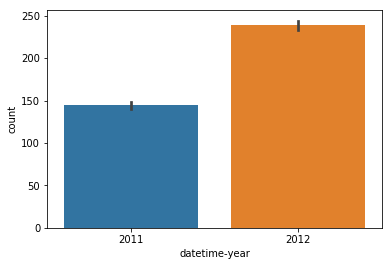

In [8]:
# 연도별 대여량
sns.barplot(data=train, x="datetime-year", y="count")

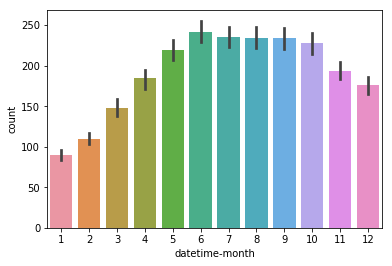

In [9]:
# 월별 대여량
sns.barplot(data=train, x="datetime-month", y="count")

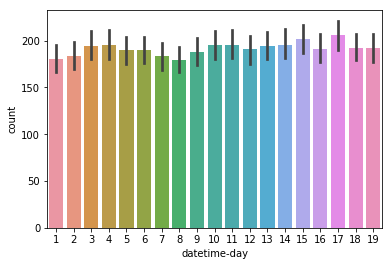

In [10]:
# 일별 대여량
sns.barplot(data=train, x="datetime-day", y="count")

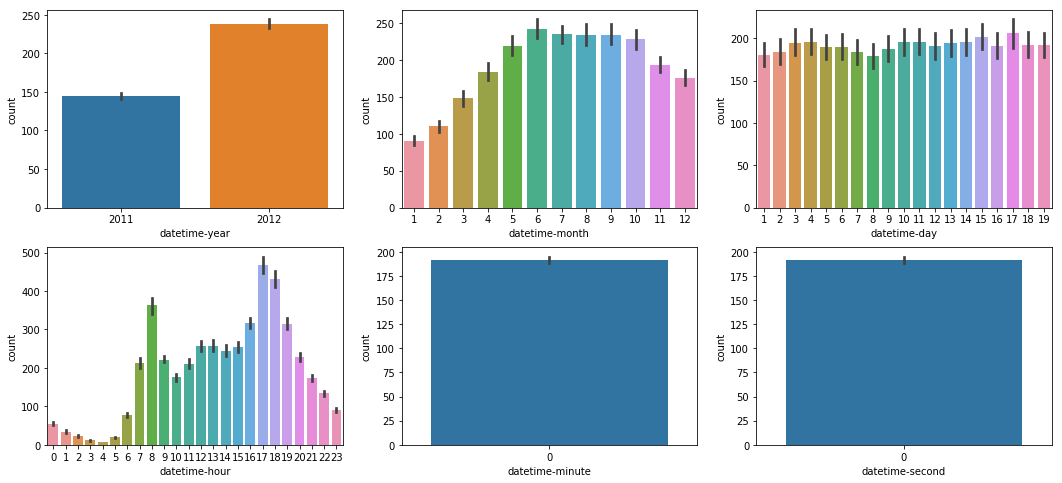

In [11]:
# 모든 요소를 모아서 한번에 보기
figure, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows = 2, ncols = 3)
figure.set_size_inches(18, 8)

sns.barplot(data=train, x="datetime-year", y="count", ax=ax1)
sns.barplot(data=train, x="datetime-month", y="count", ax=ax2)
sns.barplot(data=train, x="datetime-day", y="count", ax=ax3)
sns.barplot(data=train, x="datetime-hour", y="count", ax=ax4)
sns.barplot(data=train, x="datetime-minute", y="count", ax=ax5)
sns.barplot(data=train, x="datetime-second", y="count", ax=ax6)

### 1-2) 이 시각화로 발견할 수 있는 사실

1. datetime-year
  * 2011년도의 자전거 대여량보다 2012년도의 자전거 대여량이 더 높은것을 보면 꾸준히 성장하는 회사 임을 짐작할 수 있음.

2. datetime-month
  * 6~8월, 계절상으로는 여름에 자전거를 많이 빌리며, 12~2월, 계절상으로는 겨울에는 자전거를 많이 빌리지 않음.
  
3. datetime-day
  * x축에 19일까지만 존재함. 나머지 20일부터는 test 데이터에 있으므로 이것만 가지고는 알 수 없음.

4. datetime-hour**
  * 새벽 시간 보다는 오후 시간에 상대적으로 자전거를 많이 빌림.
  * 7~9시와 16시~19시에 많이 빌림.
  
5. datetime-minute** & **datetime-second**
  * 의미 없는 데이터

### 1-3) 예측 모델 계선 가능성

1. (```datetime-minute```)과 초(```datetime-second```)는 사용할 필요가 없음.
2. (```datetime-day```) 컬럼이 19일로 끝이나기 때문에 feature로 쓰기는 부적합 함.
3. (```workingday```) 7~9시와 16시~19시를 표현 해주고 있음.

### 2. weather

### 2-1) 시각화를 하기 전 예상

1. 안 좋은 날씨일수록 자전거 대여량이 낮을 것임.
2. 범주형(categorical) 데이터로 처리해야 함. 높고 낮음의 개념이 아닐 것임.

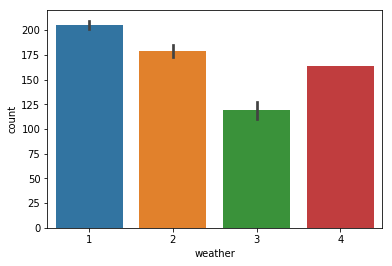

In [12]:
sns.barplot(data=train, x="weather", y="count")

### 2-2) 이 시각화로 발견할 수 있는 사실

1. 날씨(```weather```)가 안 좋을수록 자전거 대여량이 낮아짐.
2. 날씨가 4인 경우, 즉 아주 많은 비가 오거나 우박이 내리는 경우에 자전거를 많이 빌리는 현상이 보임.
3. 그리고 시각화에서 신뢰 구간(confidence interval)이 날씨가 4인 경우에는 보이지 않음. 뭔가 다른 현상이 발생하고 있음을 알 수 있음.

### 2-3) 예측 모델 계선 가능성

1. 날씨(```weather```) 컬럼값이 1 ~ 3이므로 따로 날씨를 전처리 하지 않더라도 feature 로 사용 가능.
2. 4번 날씨의 경우 실제 엑셀로 확인 결과 train 에서 1건, test 2건이 발견됨.
3. 4의 데이터를 3으로 바꾸는것도 나쁘지 않다고 생각함.

### 3. windspeed

### 3-1) 시각화를 하기 전 예상

1. 연속형(continuous) 자료이므로 분포를 시각화하면 전형적인 정규 분포를 보일 것임.
2. 완벽한 정규 분포가 나오지는 않을 것이며 한쪽으로 치우쳐 있을 것 같음.
3. 바람이 너무 많이 불면 자전거를 덜 빌릴 것 같음.

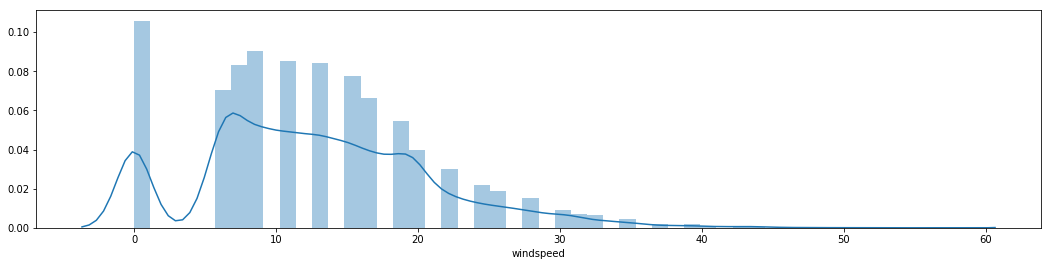

In [13]:
# windspeed 데이터의 전체 분포(distribution)을 시각화
plt.figure(figsize = (18, 4))

sns.distplot(train["windspeed"])

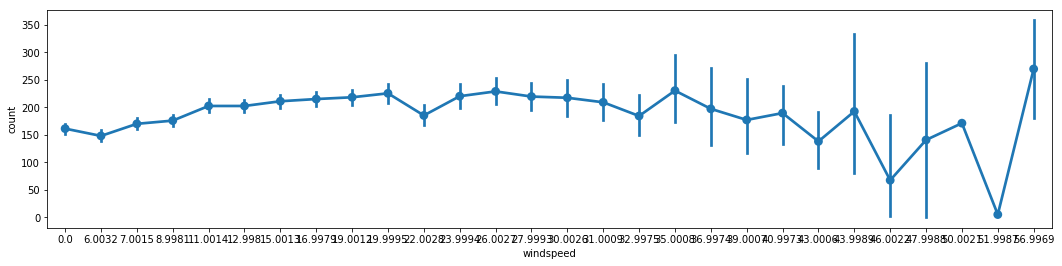

In [14]:
# x축에는 풍속(windspeed)을, y축에는 자전거 대여량(count)
plt.figure(figsize = (18, 4))

sns.pointplot(data=train, x="windspeed", y="count")

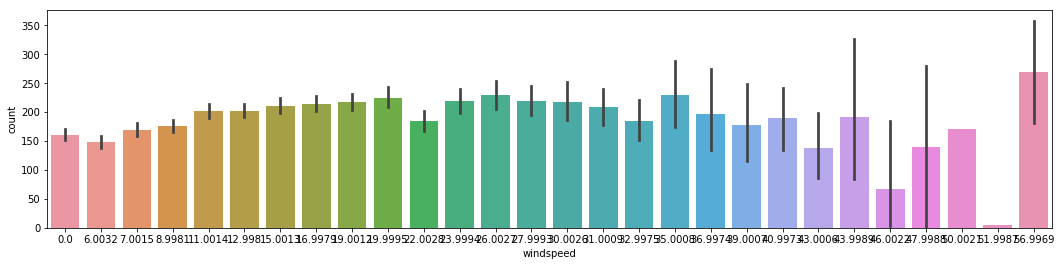

In [15]:
# x축에는 풍속(windspeed)을, y축에는 자전거 대여량(count)
plt.figure(figsize = (18, 4))

sns.barplot(data=train, x="windspeed", y="count")

데이터중 소숫점이 차지하는 부분이 많아 이 부분을 정리를 하는 것도 괜찮을 것 같음.

[0.    0.003 0.998 0.001 1.    0.998 0.001 0.998 0.001 0.003 0.003 0.999
 0.999 0.003 0.002 0.998 0.997 0.001 0.001 0.001 0.999 0.997 0.999 0.002
 0.002 0.001 0.997 0.999]


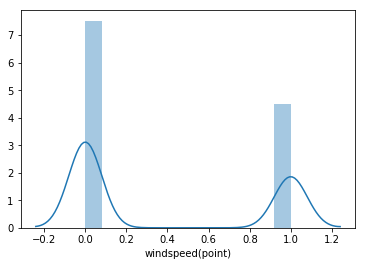

In [16]:
# 풍속을 정수형(int)으로 변환하여 사용
# 소숫점만 모은 컬럼을 windspeed(point)라는 이름의 새로운 컬럼에 할당
train["windspeed(point)"] = train["windspeed"] - train["windspeed"].astype('int')

# windspeed(point) 컬럼의 중복을 제거하여 종류를 출력하며, 소수점 3자리까지 표시
print(train["windspeed(point)"].unique().round(3))

sns.distplot(train["windspeed(point)"])

### 3-2) 이 시각화로 발견할 수 있는 사실

1. 정규 분포이지만 값이 연속적(continuous)이지 않고 군데군데 비어있는 구간이 보여서 범주형(categorical) 데이터 같음.
2. 풍속이 0인 경우가 너무 많음.

### 3-3) 예측 모델 계선 가능성

1. 풍속(windspeed) 데이터를 그대로 사용해도 괜찮을 것 같음.
2. 풍속이 0인 경우가 너무 많은데 이를 0.6의 수치와 같은 값으로 넣고 예측을 해야 할것 같음.
3. 그것이 아니라면 0의 값이 오류라고 생각이 될 수도 있기 때문에 0이 나온 값의 날짜, 시간, 계절, 온도, 기온을 이용하여 비슷한 값을 넣을 수 있도록 해야 할것 같음.

### 4. temp

### 4-1) 시각화를 하기 전 예상

1. 온도가 너무 낮거나 높을 경우 빌리는 정도가 적어서 연속성 데이터로서 정규 분포의 모습을 보일것 같음.
2. 몇몇 아웃라이어가 존재하거나, 온도가 특별히 많이 높아서 분포의 오른쪽이 길게 늘어지는 현상이 발생 할 수도 있음.
3. 체감 온도로 분석을 해도 유사한 모습을 보일 것 같음.

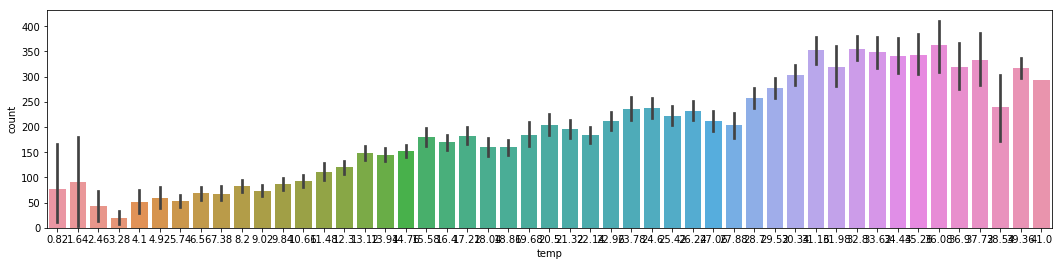

In [17]:
plt.figure(figsize = (18, 4))

sns.barplot(data=train, x="temp", y="count")

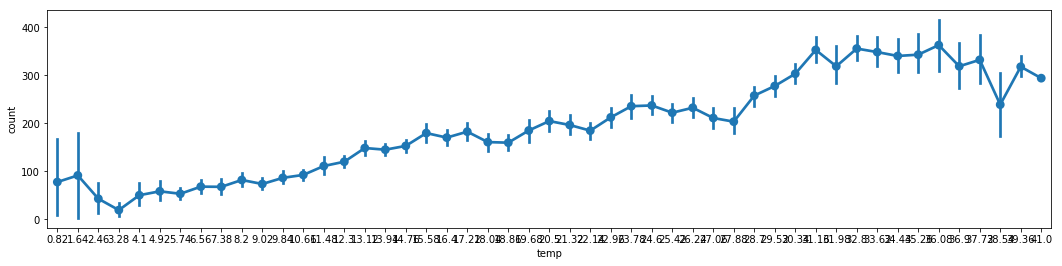

In [18]:
plt.figure(figsize = (18, 4))

sns.pointplot(data=train, x="temp", y="count")

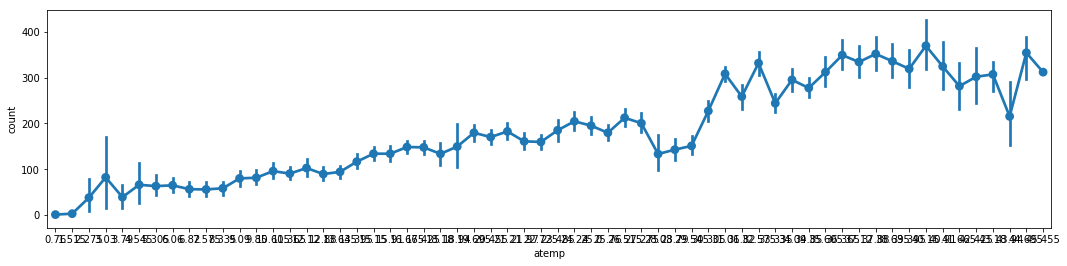

In [19]:
# 체감온도를 이용한 시각화
plt.figure(figsize = (18, 4))

sns.pointplot(data=train, x="atemp", y="count")

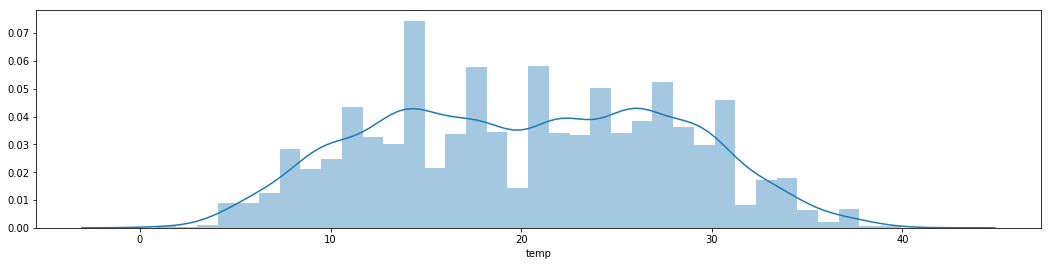

In [20]:
plt.figure(figsize = (18, 4))

sns.distplot(train["temp"])

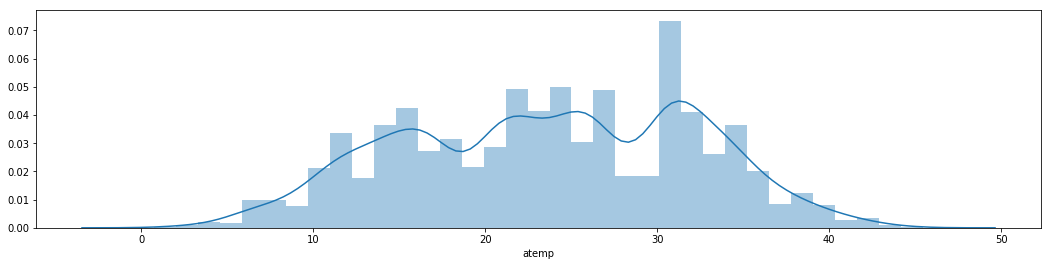

In [22]:
plt.figure(figsize = (18, 4))

sns.distplot(train["atemp"])

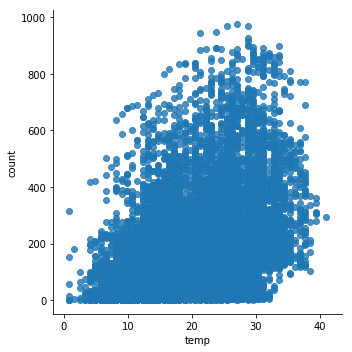

In [23]:
sns.lmplot(data=train, x="temp", y="count", fit_reg=False)

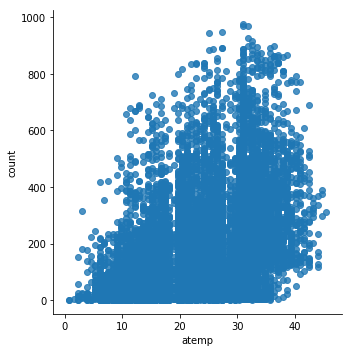

In [21]:
sns.lmplot(data=train, x="atemp", y="count", fit_reg=False)

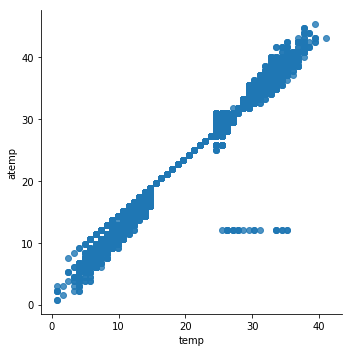

In [24]:
# 온도와 체감온도 와의 관계 시각화
sns.lmplot(data=train, x="temp", y="atemp", fit_reg=False)

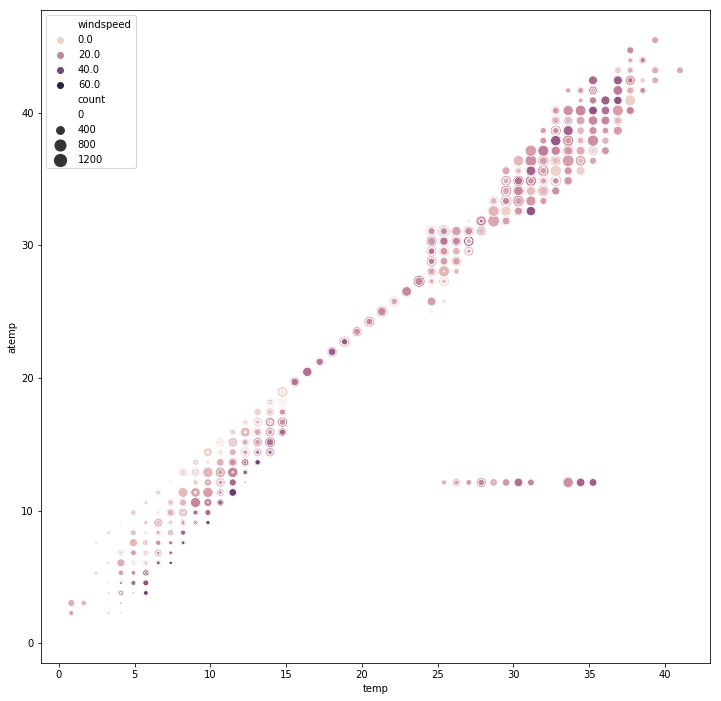

In [25]:
# 온도와 체감온도와의 관계를 횟수로 원의 크기, 풍속에 따라 원의 진하기로 표현
plt.figure(figsize=(12,12))

sns.scatterplot(data=train, x="temp", y="atemp", size="count", sizes=(0, 150), hue="windspeed")

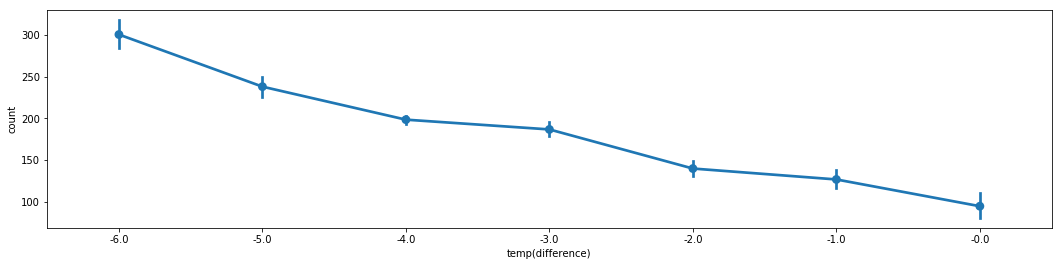

In [26]:
# 온도와 체감 온도의 차이에 따른 대여량 비교 시각화
train["temp(difference)"] = train["temp"] - train["atemp"]

train["temp(difference)"] = train["temp(difference)"].round()

train.loc[train["temp(difference)"] < -6, "temp(difference)"] = -6
train.loc[train["temp(difference)"] > 0, "temp(difference)"] = 0


plt.figure(figsize=(18,4))

sns.pointplot(data=train, x="temp(difference)", y="count")

### 4-2) 이 시각화로 발견할 수 있는 사실

1. 연속형 데이터로서 정규분포의 모습을 보일려고 하고 있음. 
2. 기온이 올라 갈 수록 count도 올라가므로 더워도 자전거를 탈만 한 것임을 알 수 있음.
3. 체감온도(atemp)가 온도(temp)보다 높을 경우 자전거를 더 많이 빌림.

### 4-3) 예측 모델 계선 가능성
1. 기온 데이터가 머신러닝 알고리즘이 예측하는데 도움이 될 것 같음.
2. 기온은 계절(season)과 연관성이 높아 둘을 결함 하는 것도 괜찮을 것 같음.
3. 체감 온도와 온도의 차이가 생기는 부분을 찾기 위해 체감 온도에 영향을 주는 습도(humidity)와 바람세기(windspeed)의 연관성 살펴 볼 것.

### 5. datetime-dayofweek

### 5-1) 시각화를 하기 전 예상

1. 요일이냐에 따라서 자전거 대여량이 다르게 시각화 될 것 같음.
2. 주말이라하더라도 토/일 차이와 월/금의 차이를 보일 것 같음.

In [27]:
train["datetime-dayofweek"] = train["datetime"].dt.day_name()

print(train.shape)
train[["datetime", "datetime-dayofweek"]]

(10886, 21)


,datetime,datetime-dayofweek
0,2011-01-01 00:00:00,Saturday
1,2011-01-01 01:00:00,Saturday
2,2011-01-01 02:00:00,Saturday
3,2011-01-01 03:00:00,Saturday
4,2011-01-01 04:00:00,Saturday
5,2011-01-01 05:00:00,Saturday
6,2011-01-01 06:00:00,Saturday
7,2011-01-01 07:00:00,Saturday
8,2011-01-01 08:00:00,Saturday
9,2011-01-01 09:00:00,Saturday


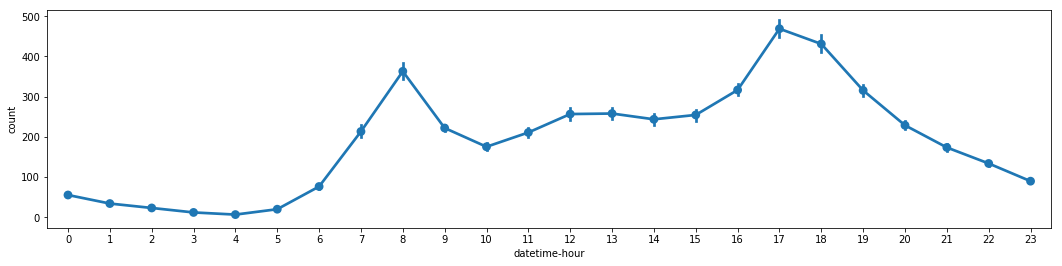

In [28]:
plt.figure(figsize=(18,4))

sns.pointplot(data=train, x="datetime-hour", y="count")

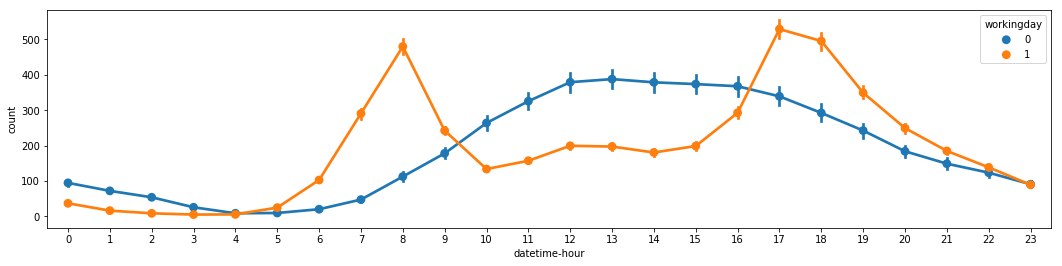

In [29]:
# 출퇴근 시간을 구분하여 시각화
plt.figure(figsize=(18,4))

sns.pointplot(data=train, x="datetime-hour", y="count", hue="workingday")

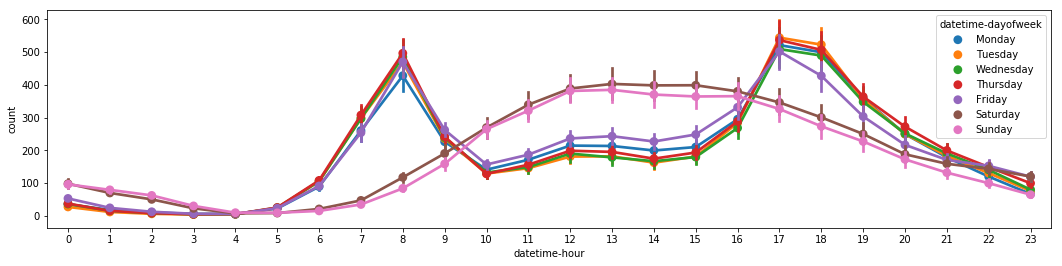

In [30]:
# 요일별 시각화
plt.figure(figsize=(18,4))

dayofweek_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday","Sunday"]

sns.pointplot(data=train, x="datetime-hour", y="count", hue="datetime-dayofweek", hue_order=dayofweek_order)

### 5-2) 이 시각화로 발견할 수 있는 사실

1. 일요일이 토요일보다 자전거 대여량이 낮음. 출근 전날이라 그럴 수 있다고 생각됨.
2. 금요일 저녁이 다른 주중 저녁보다 대여량이 낮음.

### 5-3) 예측 모델 계선 가능성

1. 요일(datetime-dayofweek) 컬럼이 머신러닝 성능에 긍정적 영향을 줄것 같음.
2. 근무일(workingday)컬럼만 넣는 것 보다 요일(datetime-dayofweek) 컬럼이 더 나을 수 있음.
3. One Hot Encoding을 하는 것이 더 나을 것임.

### 6. casual & registered

### 6-1) 시각화를 하기 전 예상

1. casual & registered 를 더한 것이 count 이기에 유사한 패턴이 나올 것임.
2. 허나 각각을 두고 보았을 경우 차이가 날 것으로 보임.
3. registered에 비해, casual 컬럼이 더 패턴이 어려울 것으로 보임.

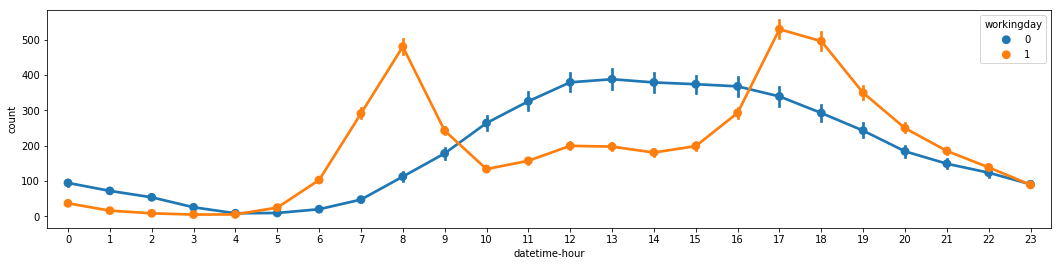

In [31]:
# working day 에 따른 count의 시각화
plt.figure(figsize=(18,4))

sns.pointplot(data=train, x="datetime-hour", y="count", hue="workingday")

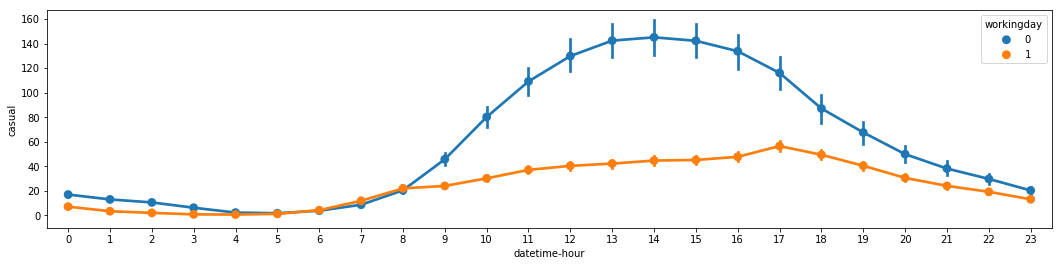

In [32]:
# working day 에 따른 registered의 시각화
plt.figure(figsize=(18,4))

sns.pointplot(data=train, x="datetime-hour", y="casual", hue="workingday")

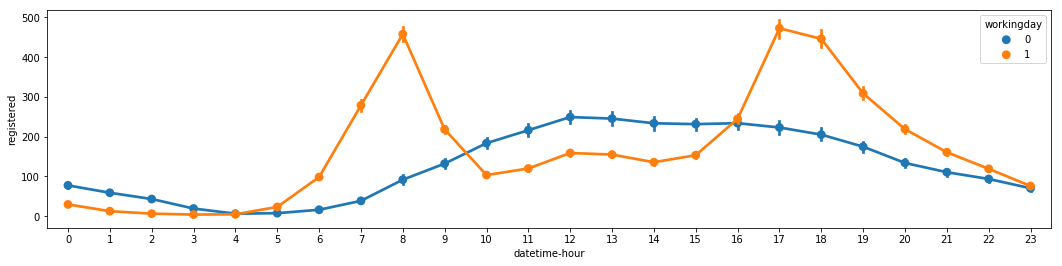

In [33]:
# working day 에 따른 casual의 시각화
plt.figure(figsize=(18,4))

sns.pointplot(data=train, x="datetime-hour", y="registered", hue="workingday")

### 6-2) 이 시각화로 발견할 수 있는 사실

1. 시간(datetime-hour)에 따른 자전거 대여량의 변화량을 비교해보니, 비회원과 회원의 차이가 많이 남.
2. registered은 주로 출퇴근시에 casual은 주로 주말에 자전거를 빌림.
3. casual보다는 registered가 자전거를 더 많이 빌림.

### 6-3) 예측 모델 계선 가능성

1. casual와 registered는 test 데이터에 넣을 수 없기 때문에 feature로 활용할 수 없음.
2. count을 예측하지 말고 casual과 registered를 각각 label로 간주하고 예측한 뒤 더 해 보기.